In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Defining X, y

In [4]:
X = df.drop('sales', axis=1)

In [5]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [6]:
y = df['sales']

In [7]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# Converting to Polynomial Features

### Choosing Degree for the Polynomial

In [8]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    X_polynomial_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_polynomial_features, y, test_size= 0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_predicted = model.predict(X_train)
    test_predicted = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predicted))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predicted))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [9]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020695,
 0.3517083688399345,
 0.25093429203443857,
 0.19404079884220665,
 5.4217056935652685,
 0.1431711767827839,
 0.17254817249854365]

In [10]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269,
 0.5803286825216851,
 0.5077742636722449,
 2.575818175027777,
 4.305885040123266,
 1379.0991000113784,
 4212.9982767766915,
 95994.59945174544]

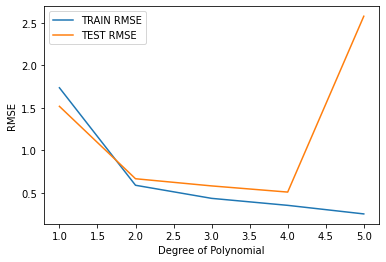

In [11]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')
plt.legend()

We select 3 degree polynomial due to lower RMSE value for both train and test.

In [12]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [13]:
polynomial_converter.fit(X)

PolynomialFeatures(degree=3, include_bias=False)

In [14]:
X_polynomial_features = polynomial_converter.transform(X)

In [15]:
X_polynomial_features.shape

(200, 19)

# Spliting the DataFrame to Train and Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_polynomial_features, y, test_size= 0.3, random_state=101)

In [17]:
len(df)

200

In [18]:
print(len(X_train), len(y_train))

140 140


In [19]:
print(len(X_test), len(y_test))

60 60


# Fitting and Testing the Model (X_train, y_train)

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
campaign = [[230.1,37.8,69.2]]

In [35]:
polynomial_campaign_data = polynomial_converter.transform(campaign)

In [36]:
model.predict(polynomial_campaign_data)

array([21.23438312])

We're getting 21.23 here, and the actual is 22.1.

# Error Calculation

### 1. Mean Absolute Error

In [42]:
y_test_predicted = model.predict(X_test)

In [43]:
mean_absolute_error(y_test, y_test_predicted)

0.412751608537904

### 2. Mean Squared Error

In [44]:
mean_squared_error(y_test, y_test_predicted)

0.33678137975735484

### 3. Root Mean Squared Error

In [45]:
np.sqrt(mean_squared_error(y_test, y_test_predicted))

0.5803286825216851

# Residuals

In [46]:
y_test_residuals = y_test - y_test_predicted

In [47]:
y_test_residuals

37     0.083563
109    0.744171
31    -0.706871
89    -0.590481
66     1.708451
119   -0.215221
54     0.243834
74    -0.132289
145   -0.101335
142    0.389325
148    1.490103
112    0.109640
174   -0.117859
55     0.717356
141    0.254277
149    0.691898
25    -0.332938
34     0.065431
170   -0.353100
39     0.224284
172    0.773585
153   -0.299803
175   -0.394957
61    -0.172005
65    -0.180353
50     0.145873
42    -0.029483
129    0.055539
179    0.076490
2      0.865179
12     0.379789
133   -0.163065
90     0.277693
22    -1.367010
41    -0.978903
32     0.149260
125   -0.123422
196   -0.241483
158    0.219019
180   -0.267699
16     0.471318
186   -0.041527
144   -0.185873
121   -0.647018
80    -0.094917
18     0.550038
78     0.152090
48    -0.477625
4     -0.061521
15    -0.027886
1     -0.317643
43     0.119684
102   -0.097766
164   -0.346327
9     -0.528771
155   -1.715875
36     0.449869
190    1.298846
33     0.107900
45    -0.639566
Name: sales, dtype: float64

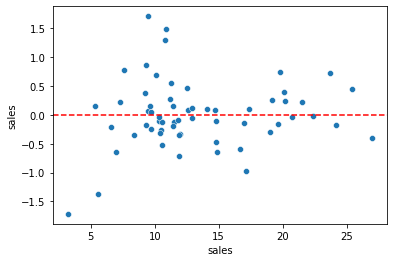

In [48]:
sns.scatterplot(x=y_test, y=y_test_residuals)
plt.axhline(y=0, color='red', ls='--')

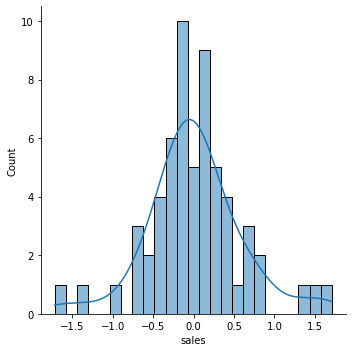

In [49]:
sns.displot(y_test_residuals, bins=25, kde=True)

# Fiting and the Testing the Model (X_polynomial_features, y)
#### X_polynomial_features is generated from X

In [37]:
final_model = LinearRegression()

In [38]:
final_model.fit(X_polynomial_features, y)

LinearRegression()

### Prediction for a sample Data

Here we're taking 149 TV, 22 Radio and 12 Newspaper. We've to predict the Sales for this.

In [39]:
campaign = [[149,22,12]]

In [40]:
polynomial_campaign_data = polynomial_converter.transform(campaign)

In [41]:
final_model.predict(polynomial_campaign_data)

array([14.64501014])